<a href="https://colab.research.google.com/github/git933/Computer_Vision/blob/main/210705.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# vector space

- closed set of vectors by linear combination of element vectors
- the origin should be included



---



# image acqusition

- image resolution is usually better when pixels are increased.
- image resolution is better when spatial sampling is finer.
- image resolution is better when blurring is less.
- the more intensity levels, the better the detailed contents.


1. spatial sampling by pixel grid
2. quantization of intensities
3. noise reduction
4. demosaic
5. contrast enhancement
6. color enhancement
7. radiometric compensation

    white balance, anti-vignette
8. lens distortion compensation
9. compression



---



# color space

- 3 primaries = 빛의 3원색

HSV(색상, 채도, 명도) - Hue, Saturation, Value
YUV(흑백, R-Y, B-Y)

import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2hsv

- transform of RGB to HSV : python function **rgb2hsv()**

YUV

- correlation reduction : reducing the redundancy (중복값 제거)
- H = entropy (정보량) = 1pixel당 표현해야 하는 비트 수



---



# multispectral imaging

- full spectrum representation -> funcion space

- parkkinen basis : 8 basis spectral functions

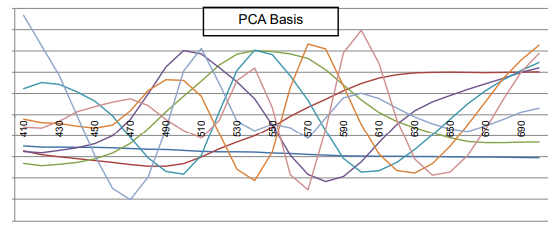



---



# image measure (similarity / quality)

- SNR : signal to noise ratio
- PSNR : peak SNR

- SSIM : 새로운 영상이 원본과 얼마나 차이나는지 보여줌 (성능 : PSNR < SSIM)



---



# image enhancement

- histogram equaliaztion : 그래프를 좌우로 늘려서(빨강) 누적 확률분포함수 생성(검정)

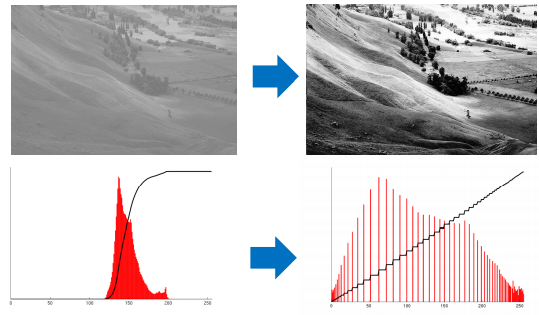

- **과제** : 직접 해 보기- HSV space equalization 
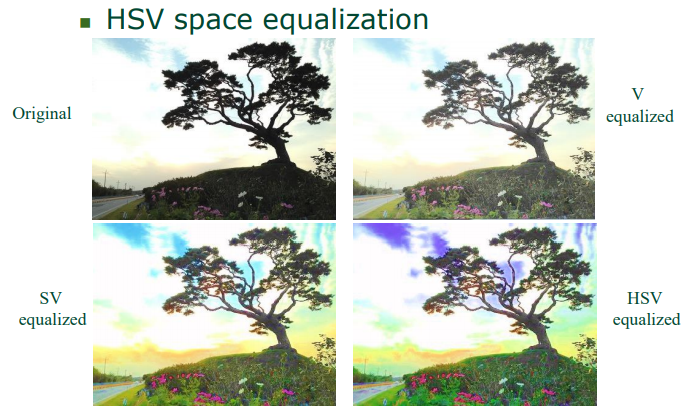

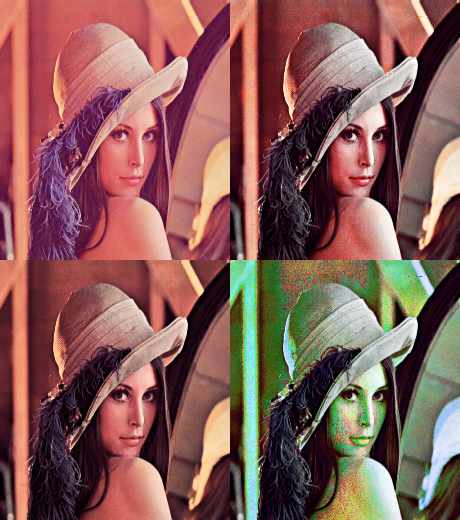

In [ ]:
import cv2
import numpy as np
import argparse
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

path = "/content/drive/MyDrive/ComputerVision_class/Lenna.png"

# 입력 받은 이미지를 불러오고 출력
src = cv2.imread(path)

# 사이즈 조절
src = cv2.resize(src, (230, 260))

# hsv 컬러 형태로 변형
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
# h, s, v로 컬러 영상 분리
h, s, v = cv2.split(hsv)


# v값 히스토그램 평활화
equalizedV = cv2.equalizeHist(v)

# h,s,equalizedV를 합쳐서 새로운 hsv 이미지를 만듭니다.
hsv2 = cv2.merge([h,s,equalizedV])

# 마지막으로 hsv2를 다시 BGR 형태로 변경합니다.
hsvDst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
# 사이즈 조절
hsvDst = cv2.resize(hsvDst, (230, 260))


# s값 히스토그램 평활화
equalizedS = cv2.equalizeHist(s)

# h,s,equalizedV를 합쳐서 새로운 hsv 이미지를 만듭니다.
hsv3 = cv2.merge([h,equalizedS,equalizedV])

# 마지막으로 hsv3를 다시 BGR 형태로 변경합니다.
hsvDst1 = cv2.cvtColor(hsv3, cv2.COLOR_HSV2BGR)
# 사이즈 조절
hsvDst1 = cv2.resize(hsvDst1, (230, 260))



# h값 히스토그램 평활화
equalizedH = cv2.equalizeHist(h)

# h,s,equalizedV를 합쳐서 새로운 hsv 이미지를 만듭니다.
hsv4 = cv2.merge([equalizedH,equalizedS,equalizedV])

# 마지막으로 hsv4를 다시 BGR 형태로 변경합니다.
hsvDst2 = cv2.cvtColor(hsv4, cv2.COLOR_HSV2BGR)
# 사이즈 조절
hsvDst2 = cv2.resize(hsvDst2, (230, 260))


add = cv2.hconcat([cv2.vconcat([src, hsvDst]), cv2.vconcat([hsvDst1, hsvDst2])])
cv2_imshow(add)


cv2.waitKey()
cv2.destroyAllWindows()

# bilateral filter (denoise filter)

- bilateral filter => domain + range (2 parameters)

# median filter

# image sharpening using high pass filter

filter 내부 값을 모두 더하면 1 (자기자신) 이 됨

어두운것은 더 어둡게, 밝은것은 더 밝게